In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
import time

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier

In [26]:
X_train = pd.read_csv('train_data.csv')
X_train.head(10)

,m_label,strength,italic,m_top,m_left,originalH,originalW,r0c0,r0c1,r0c2,...,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
0,8710,0.4,1,35,21,46,39,1,1,1,...,255,255,255,255,255,255,255,255,255,182
1,99,0.4,0,48,23,33,25,1,1,1,...,255,255,225,101,41,1,1,1,1,1
2,835,0.4,0,33,16,13,8,1,1,128,...,1,1,1,1,1,1,1,1,1,1
3,48,0.4,0,0,0,18,11,27,31,49,...,249,247,244,236,212,184,127,94,41,29
4,3653,0.4,0,46,21,50,23,1,1,1,...,1,1,1,1,56,255,255,255,255,255
5,697,0.4,0,37,25,16,7,255,255,255,...,255,255,255,255,73,1,1,1,1,1
6,52,0.4,0,0,0,13,11,40,40,40,...,222,218,222,233,240,249,240,236,157,139
7,195,0.4,1,34,21,60,58,1,1,1,...,1,1,150,255,255,255,255,238,1,1
8,7534,0.4,0,37,19,47,26,1,1,1,...,255,255,229,184,1,1,1,1,1,1
9,653,0.7,1,53,20,31,43,1,1,1,...,255,161,1,1,1,1,1,202,255,255


In [27]:
y_train = pd.read_csv('train_labels.csv')
y_train.head(10)

,Font
0,ARIAL
1,TIMES
2,TIMES
3,ARIAL
4,SERIF
5,CAMBRIA
6,ARIAL
7,ARIAL
8,CAMBRIA
9,CALIBRI


In [28]:
X_test = pd.read_csv('test_data.csv')
X_test.head(10)

,m_label,strength,italic,m_top,m_left,originalH,originalW,r0c0,r0c1,r0c2,...,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
0,49,0.4,0,0,0,36,36,1,1,1,...,114,240,255,255,255,255,255,224,114,51
1,8453,0.7,1,33,25,50,55,1,1,52,...,1,1,14,107,154,154,89,24,1,1
2,64421,0.7,1,32,31,55,39,1,1,1,...,1,1,49,132,222,255,255,195,1,1
3,1704,0.7,0,29,24,70,58,1,1,1,...,255,235,183,117,47,7,1,1,1,1
4,1102,0.4,0,49,24,39,45,125,125,83,...,125,241,255,255,212,125,1,1,1,1
5,598,0.7,0,39,22,57,35,1,1,1,...,1,1,1,22,140,217,255,255,255,204
6,722,0.7,1,64,28,15,7,255,255,255,...,1,1,1,1,1,1,1,1,1,1
7,57,0.4,0,0,0,14,8,1,1,8,...,1,1,1,1,1,20,20,10,1,1
8,65236,0.4,0,31,18,39,20,1,1,1,...,255,255,255,255,255,255,255,255,255,255
9,7811,0.4,0,35,20,46,47,1,1,1,...,1,1,1,56,227,11,1,1,1,1


In [29]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
print(X_train)
print(y_train)

[[8.710e+03 4.000e-01 1.000e+00 ... 2.550e+02 2.550e+02 1.820e+02]
 [9.900e+01 4.000e-01 0.000e+00 ... 1.000e+00 1.000e+00 1.000e+00]
 [8.350e+02 4.000e-01 0.000e+00 ... 1.000e+00 1.000e+00 1.000e+00]
 ...
 [7.761e+03 7.000e-01 0.000e+00 ... 1.000e+00 1.000e+00 1.000e+00]
 [3.617e+03 7.000e-01 0.000e+00 ... 1.250e+02 1.250e+02 1.250e+02]
 [1.784e+03 4.000e-01 0.000e+00 ... 2.390e+02 2.550e+02 1.750e+02]]
[['ARIAL']
 ['TIMES']
 ['TIMES']
 ...
 ['SERIF']
 ['TAHOMA']
 ['TAHOMA']]


In [6]:
print(X_train.shape)
print(y_train.shape)

(65000, 407)
(65000, 1)


In [7]:
newlength = int(X_train.shape[0]/100)

X_train_new = X_train[:newlength]
y_train_new = y_train[:newlength]
print(X_train_new.shape)
print(y_train_new.shape)

(650, 407)
(650, 1)


In [37]:
# Shifting
X_train_temp = (np.hstack((X_train,X_train[:,7:27])))
print(X_train_temp.shape)

X_train_shifted = np.delete(X_train_temp,[7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26],1)
print(X_train_shifted.shape)

# Augmenting
X_train_augmented = np.vstack((X_train, X_train_shifted))
y_train_augmented = np.vstack((y_train, y_train))
X_train_augmented.shape, y_train_augmented.shape

(65000, 427)
(65000, 407)


((130000, 407), (130000, 1))

# Pre-processing

In [8]:
mean = np.zeros((1, X_train.shape[1]))
std = np.ones((1, X_train.shape[1]))


# ====== Your code here ========

# Compute the mean and standard deviation
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

# ====== Your code here ========

def transform(X, mean, std):
    # X: n x d matrix
    # mean and std: 1 x d matrix
    # X_out: n x d matrix
    X_out = np.zeros(X.shape)
    # ====== Your code here ========
   
    X_out = (X - mean) / std
   
    # ====== Your code here ========
    return X_out 

X_train_scaled = transform(X_train, mean, std)
X_test_scaled = transform(X_test, mean, std)

print(mean.shape)
print(std.shape)

(407,)
(407,)


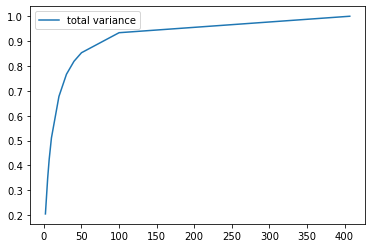

In [19]:
num_comp = [2,5,7,10,20,30,40,50,100,407]
#========Your code here ======
from sklearn.decomposition import PCA

total_variance_explained = []

for i in num_comp:
    pca = PCA(n_components=i)
    pca.fit(X_train_scaled, y_train)
    total_variance_explained.append(sum(pca.explained_variance_ratio_))
#     if i == 500:
#         singular_values = pca.singular_values_
#==============================
plt.figure(1)
plt.plot(num_comp,total_variance_explained,label='total variance')
plt.legend()
plt.show()

# Classifier experiments

In [29]:
pca100 = PCA(n_components=100)
pca100.fit(X_train_scaled, y_train)

pca200 = PCA(n_components=200)
pca200.fit(X_train_scaled, y_train)

PCA(n_components=200)

### KNN with PCA

In [32]:
KNN1 = KNeighborsClassifier(n_neighbors=1)
KNN3 = KNeighborsClassifier(n_neighbors=3)
KNN5 = KNeighborsClassifier(n_neighbors=5)

#### 1 Nearest Neighbor

In [33]:
start_time = time.time()
KNN1.fit(pca100.transform(X_train_scaled),y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_knn1_pca100 = KNN1.predict(pca100.transform(X_test_scaled))
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 1.142 seconds
Test time 74.624 seconds


In [36]:
start_time = time.time()
KNN1.fit(pca200.transform(X_train_scaled),y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_knn1_pca200 = KNN1.predict(pca200.transform(X_test_scaled))
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 2.060 seconds
Test time 155.913 seconds


#### 3 Nearest Neighbor

In [13]:
start_time = time.time()
KNN3.fit(pca100.transform(X_train_scaled),y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_knn3_pca100 = KNN3.predict(pca100.transform(X_test_scaled))
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 0.961 seconds
Test time 146.529 seconds


In [30]:
start_time = time.time()
KNN3.fit(pca200.transform(X_train_scaled),y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_knn3_pca200 = KNN3.predict(pca200.transform(X_test_scaled))
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 1.941 seconds
Test time 294.139 seconds


#### 5 Nearest Neighbor

In [26]:
start_time = time.time()
KNN5.fit(pca100.transform(X_train_scaled),y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_knn5_pca100 = KNN5.predict(pca100.transform(X_test_scaled))
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 1.037 seconds
Test time 187.082 seconds


### KNN without PCA

In [ ]:
start_time = time.time()
KNN1 = KNeighborsClassifier(n_neighbors=3)

KNN1.fit(X_train_scaled,y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_knn1 = KNN1.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train.ravel())

LogisticRegression(max_iter=10000)

In [42]:
y_pred = clf_red.predict(X_test)

ValueError: maximum supported dimension for an ndarray is 32, found 29221

In [69]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())
y_pred = gnb.predict(X_test)

In [92]:
from sklearn.naive_bayes import MultinomialNB
gnb = MultinomialNB()
gnb.fit(X_train, y_train.ravel())
y_pred = gnb.predict(X_test)

### Decision Tree Classifier

In [10]:
from sklearn.tree import DecisionTreeClassifier

start_time = time.time()
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_tree = clf_tree.predict(X_test)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 14.691 seconds
Test time 0.507 seconds


### Random Forest

In [30]:
start_time = time.time()
clf_bag64 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=64)
clf_bag64.fit(pca100.transform(X_train_scaled), y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
clf_bag64_pca100 = clf_bag64.predict(pca100.transform(X_test_scaled))
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 500.156 seconds
Test time 2.378 seconds


In [26]:
start_time = time.time()
clf_bag64 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=64)
clf_bag64.fit(X_train, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
clf_bag64 = clf_bag64.predict(X_test)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 587.364 seconds
Test time 4.596 seconds


In [ ]:
start_time = time.time()
clf_bag64 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=64)
clf_bag64.fit(X_train, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
clf_bag64 = clf_bag64.predict(X_test)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

In [10]:
start_time = time.time()
clf_bag128 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=128)
clf_bag128.fit(X_train, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_bag128 = clf_bag128.predict(X_test)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 1167.044 seconds
Test time 28.838 seconds


In [ ]:
start_time = time.time()
clf_bag128 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=128)
clf_bag128.fit(X_train, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_bag128 = clf_bag128.predict(X_test)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

In [28]:
start_time = time.time()
clf_bag256 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=256)
clf_bag256.fit(X_train, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_bag256 = clf_bag256.predict(X_test)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 2305.316 seconds
Test time 16.778 seconds


### AdaBoost

In [22]:
start_time = time.time()
clf_ada128 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=128)
clf_ada128.fit(X_train, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_ada128 = clf_ada128.predict(X_test)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 2096.456 seconds
Test time 6.920 seconds


### XgBoost

In [14]:
start_time = time.time()
clf_xgb = XGBClassifier(max_depth=10, objective="multi:softprob", random_state=42)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d10 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 512.040 seconds
Test time 1.297 seconds


In [20]:
start_time = time.time()
clf_xgb = XGBClassifier(eta=0.4, max_depth=10, objective="multi:softprob", random_state=42)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d10_e04 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 428.539 seconds
Test time 0.803 seconds


In [15]:
start_time = time.time()
clf_xgb = XGBClassifier(eta=0.5, max_depth=10, objective="multi:softprob", random_state=42)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d10_e05 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 677.992 seconds
Test time 2.078 seconds


In [9]:
start_time = time.time()
clf_xgb = XGBClassifier(eta=0.65, max_depth=10, objective="multi:softprob", random_state=42)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 876.263 seconds
Test time 2.027 seconds


In [10]:
start_time = time.time()
clf_xgb = XGBClassifier(eta=0.6, max_depth=10, objective="multi:softprob", random_state=42)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb2 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 877.966 seconds
Test time 1.774 seconds


#### depth: 12 is the best, tested 8-50

In [18]:
start_time = time.time()
clf_xgb = XGBClassifier(max_depth=11, objective="multi:softprob", random_state=42)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d11 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 814.034 seconds
Test time 1.243 seconds


In [9]:
start_time = time.time()
clf_xgb = XGBClassifier(max_depth=12, objective="multi:softprob", random_state=42)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d12 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 990.907 seconds
Test time 2.433 seconds


In [10]:
start_time = time.time()
clf_xgb = XGBClassifier(max_depth=13, objective="multi:softprob", random_state=42)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d13 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 1184.790 seconds
Test time 2.310 seconds


In [11]:
start_time = time.time()
clf_xgb = XGBClassifier(max_depth=14, objective="multi:softprob", random_state=42)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d14 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 1225.633 seconds
Test time 2.254 seconds


In [12]:
start_time = time.time()
clf_xgb = XGBClassifier(max_depth=15, objective="multi:softprob", random_state=42)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d15 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 816.458 seconds
Test time 1.033 seconds


In [13]:
start_time = time.time()
clf_xgb = XGBClassifier(max_depth=25, objective="multi:softprob", random_state=42)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d25 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 644.588 seconds
Test time 0.869 seconds


In [14]:
start_time = time.time()
clf_xgb = XGBClassifier(max_depth=50, objective="multi:softprob", random_state=42)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d50 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 697.929 seconds
Test time 0.879 seconds


In [19]:
start_time = time.time()
clf_xgb = XGBClassifier(max_depth=9, objective="multi:softprob", random_state=42)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d9 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 390.057 seconds
Test time 0.774 seconds


### test eta for depth 12

In [9]:
start_time = time.time()
clf_xgb = XGBClassifier(eta=0.2, max_depth=12, objective="multi:softprob", random_state=42)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d12_e02 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 703.858 seconds
Test time 1.338 seconds


In [10]:
start_time = time.time()
clf_xgb = XGBClassifier(eta=0.4, max_depth=12, objective="multi:softprob", random_state=42)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d12_e04 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 528.694 seconds
Test time 1.184 seconds


In [11]:
start_time = time.time()
clf_xgb = XGBClassifier(eta=0.5, max_depth=12, objective="multi:softprob", random_state=42)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d12_e05 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 510.724 seconds
Test time 1.196 seconds


In [15]:
start_time = time.time()
clf_xgb = XGBClassifier(eta=0.35, max_depth=12, objective="multi:softprob", random_state=42)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d12_e035 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 549.015 seconds
Test time 1.516 seconds


In [17]:
start_time = time.time()
clf_xgb = XGBClassifier(eta=0.375, max_depth=12, objective="multi:softprob", random_state=42)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d12_e0375 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 577.263 seconds
Test time 1.501 seconds


In [19]:
start_time = time.time()
clf_xgb = XGBClassifier(eta=0.365, max_depth=12, objective="multi:softprob", random_state=42)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d12_e0365 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 517.948 seconds
Test time 1.324 seconds


In [21]:
start_time = time.time()
clf_xgb = XGBClassifier(eta=0.385, max_depth=12, objective="multi:softprob", random_state=42)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d12_e0385 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 575.058 seconds
Test time 1.318 seconds


In [23]:
start_time = time.time()
clf_xgb = XGBClassifier(eta=0.38, max_depth=12, objective="multi:softprob", random_state=42)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d12_e038 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 511.353 seconds
Test time 1.323 seconds


In [24]:
start_time = time.time()
clf_xgb = XGBClassifier(eta=0.37, max_depth=12, objective="multi:softprob", random_state=42)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d12_e037 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 506.394 seconds
Test time 1.240 seconds


In [ ]:
start_time = time.time()
clf_xgb = XGBClassifier(eta=0.7, max_depth=12, objective="multi:softprob", random_state=42)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d12_e07 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

### depth 12 eta 0.37

### depth 12 test n_estimators

In [27]:
start_time = time.time()
clf_xgb = XGBClassifier(n_estimators=1, max_depth=12, objective="multi:softprob", random_state=42)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d12_n1 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 52.439 seconds
Test time 10.252 seconds


In [28]:
start_time = time.time()
clf_xgb = XGBClassifier(n_estimators=5, max_depth=12, objective="multi:softprob", random_state=42)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d12_n5 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 145.910 seconds
Test time 2.451 seconds


In [29]:
start_time = time.time()
clf_xgb = XGBClassifier(n_estimators=10, max_depth=12, objective="multi:softprob", random_state=42)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d12_n10 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 204.348 seconds
Test time 0.793 seconds


In [31]:
start_time = time.time()
clf_xgb = XGBClassifier(n_estimators=100, max_depth=12, objective="multi:softprob", random_state=42)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d12_n100 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 540.550 seconds
Test time 1.382 seconds


In [32]:
start_time = time.time()
clf_xgb = XGBClassifier(n_estimators=500, max_depth=12, objective="multi:softprob", random_state=42)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d12_n500 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 2186.975 seconds
Test time 3.113 seconds


In [36]:
start_time = time.time()
clf_xgb = XGBClassifier(n_estimators=700, max_depth=12, objective="multi:softprob", random_state=42)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d12_n700 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 2699.089 seconds
Test time 4.098 seconds


In [37]:
start_time = time.time()
clf_xgb = XGBClassifier(n_estimators=1000, max_depth=12, objective="multi:softprob", random_state=42)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d12_n1000 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 3639.172 seconds
Test time 5.630 seconds


In [40]:
start_time = time.time()
clf_xgb = XGBClassifier(n_estimators=2000, max_depth=12, objective="multi:softprob", random_state=42)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d12_n2000 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 12086.755 seconds
Test time 28.352 seconds


In [42]:
start_time = time.time()
clf_xgb = XGBClassifier(n_estimators=1700, max_depth=12, objective="multi:softprob", random_state=42)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d12_n1700 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 12955.566 seconds
Test time 23.738 seconds


In [ ]:
start_time = time.time()
clf_xgb = XGBClassifier(n_estimators=1900, max_depth=12, objective="multi:softprob", random_state=42)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d12_n1900 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

In [ ]:
start_time = time.time()
clf_xgb = XGBClassifier(n_estimators=1800, max_depth=12, objective="multi:softprob", random_state=42)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d12_n1800 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

#### Depth 13

In [13]:
start_time = time.time()
clf_xgb = XGBClassifier(n_estimators=2000, max_depth=13, objective="multi:softprob", random_state=42, learning_rate=0.06)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d13_n2000_lr06 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 22493.495 seconds
Test time 15.866 seconds


In [10]:
start_time = time.time()
clf_xgb = XGBClassifier(n_estimators=2919, max_depth=5, objective="multi:softprob", random_state=42, learning_rate=0.05)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d5_n2919_lr05 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 7185.751 seconds
Test time 11.306 seconds


In [ ]:
start_time = time.time()
clf_xgb = XGBClassifier(n_estimators=4000, max_depth=5, objective="multi:softprob", random_state=42, learning_rate=0.05)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d5_n2919_lr05 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

In [9]:
start_time = time.time()
clf_xgb = XGBClassifier(n_estimators=1000, max_depth=10, objective="multi:softprob", random_state=42, learning_rate=0.05)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d10_n1000_lr05 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 11502.600 seconds
Test time 17.553 seconds


In [12]:
start_time = time.time()
clf_xgb = XGBClassifier(n_estimators=400, max_depth=10, objective="multi:softprob", random_state=42, learning_rate=0.05)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d10_n400_lr05 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 3803.115 seconds
Test time 4.409 seconds


In [10]:
y_pred_xgb_d10_n1000_lr05.shape

(29221,)

In [15]:
start_time = time.time()
clf_xgb = XGBClassifier(n_estimators=2000, max_depth=10, objective="multi:softprob", random_state=42, learning_rate=0.08)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d10_n2000_lr08 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 24202.549 seconds
Test time 47.455 seconds


In [17]:
start_time = time.time()
clf_xgb = XGBClassifier(n_estimators=2000, max_depth=7, objective="multi:softprob", random_state=42, learning_rate=0.08)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d10_n2000_lr08 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 17155.230 seconds
Test time 30.588 seconds


In [19]:
start_time = time.time()
clf_xgb = XGBClassifier(n_estimators=2300, max_depth=8, objective="multi:softprob", random_state=42, learning_rate=0.1)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d8_n2300_lr1 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 32455.941 seconds
Test time 40.124 seconds


In [23]:
start_time = time.time()
clf_xgb = XGBClassifier(n_estimators=1700, max_depth=8, objective="multi:softprob", random_state=42, learning_rate=0.08)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d8_n1700_lr08 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 19699.933 seconds
Test time 30.215 seconds


In [ ]:
start_time = time.time()
clf_xgb = XGBClassifier(n_estimators=2100, max_depth=8, objective="multi:softprob", random_state=42, learning_rate=0.8)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d8_n2100_lr08 = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

### Support Vector Machine with PCA

In [40]:
start_time = time.time()
clf_svc1 = SVC(C=1, kernel='poly')
clf_svc1.fit(pca100.transform(X_train_scaled), y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_svc_poly1_pca100 = clf_svc1.predict(pca100.transform(X_test_scaled))
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 972.898 seconds
Test time 138.624 seconds


In [ ]:
start_time = time.time()
clf_svc1 = SVC(C=0.1, kernel='poly',)
clf_svc1.fit(pca100.transform(X_train_scaled), y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_svc_poly01_pca100 = clf_svc1.predict(pca100.transform(X_test_scaled))
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

In [ ]:
start_time = time.time()
clf_svc1 = SVC(C=10, kernel='poly',)
clf_svc1.fit(pca100.transform(X_train_scaled), y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_svc_poly10_pca100 = clf_svc1.predict(pca100.transform(X_test_scaled))
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

In [ ]:
start_time = time.time()
clf_svc1 = SVC(C=1, kernel='linear')
clf_svc1.fit(pca100.transform(X_train_scaled), y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_svc_linear1_pca100 = clf_svc1.predict(pca100.transform(X_test_scaled))
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

In [ ]:
start_time = time.time()
clf_svc1 = SVC(C=1, kernel='poly')
clf_svc1.fit(pca200.transform(X_train_scaled), y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_svc_poly1_pca200 = clf_svc1.predict(pca200.transform(X_test_scaled))
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

In [ ]:
start_time = time.time()
clf_svc1 = SVC(C=1, kernel='rbf')
clf_svc1.fit(pca100.transform(X_train_scaled), y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_svc_rbf1_pca100 = clf_svc1.predict(pca100.transform(X_test_scaled))
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

### Support Vector Machine without PCA

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# ====== Your code here ========
clf_svc = SVC(C=1, kernel='poly')
clf_svc.fit(X_train, y_train.ravel())
y_pred_svc = clf_svc.predict(X_test)
# ====== Your code here ========

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# ====== Your code here ========
clf_svc_scaled = SVC(C=1, kernel='poly')
clf_svc_scaled.fit(X_train_scaled, y_train.ravel())
y_pred_svc_scaled = clf_svc.predict(X_test_scaled)
# ====== Your code here ========

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# ====== Your code here ========
clf_svc_scaled = SVC(C=1, kernel='poly')
clf_svc_scaled.fit(X_train_scaled, y_train.ravel())
y_pred_svc_scaled = clf_svc_scaled.predict(X_test_scaled)
# ====== Your code here ========

### Augmented

In [31]:
start_time = time.time()
clf_xgb = XGBClassifier(n_estimators=2000, max_depth=9, objective="multi:softprob", random_state=42, learning_rate=0.1)
clf_xgb.fit(X_train_augmented, y_train_augmented.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d9_n2000_lr1_aug = clf_xgb.predict(X_test)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 16301.495 seconds
Test time 19.060 seconds


In [41]:
X_train_augmented.shape, y_train_augmented.shape

((130000, 407), (130000, 1))

In [39]:
start_time = time.time()
clf_xgb = XGBClassifier(n_estimators=2000, max_depth=9, objective="multi:softprob", random_state=42, learning_rate=0.1)
clf_xgb.fit(X_train_augmented, y_train_augmented.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d9_n2000_lr1_aug = clf_xgb.predict(X_test)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 15125.706 seconds
Test time 13.337 seconds


In [42]:
start_time = time.time()
clf_xgb = XGBClassifier(n_estimators=2100, max_depth=9, objective="multi:softprob", random_state=42, learning_rate=0.1)
clf_xgb.fit(X_train_augmented, y_train_augmented.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d9_n2100_lr1_aug = clf_xgb.predict(X_test)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 16263.204 seconds
Test time 14.048 seconds


In [45]:
start_time = time.time()
clf_xgb = XGBClassifier(n_estimators=2100, max_depth=10, objective="multi:softprob", random_state=42, learning_rate=0.1)
clf_xgb.fit(X_train_augmented, y_train_augmented.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d10_n2100_lr1_aug = clf_xgb.predict(X_test)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 15685.336 seconds
Test time 13.278 seconds


In [49]:
start_time = time.time()
clf_xgb = XGBClassifier(n_estimators=2000, max_depth=10, objective="multi:softprob", random_state=42, learning_rate=0.15)
clf_xgb.fit(X_train_augmented, y_train_augmented.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d10_n2700_lr08_aug = clf_xgb.predict(X_test)
test_time = time.time() - start_time
y_pred_train = clf_xgb.predict(X_train)
print("Test time %.3f seconds" % test_time)
print("Train accuracy: ", str(accuracy_score(y_pred_train, y_train)))

Training time 47818.202 seconds
Test time 33.891 seconds
Train accuracy:  0.9954153846153846


In [ ]:
start_time = time.time()
clf_xgb = XGBClassifier(n_estimators=2000, max_depth=10, objective="multi:softprob", random_state=42, learning_rate=0.45)
clf_xgb.fit(X_train_augmented, y_train_augmented.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d10_n2000_lr45_aug = clf_xgb.predict(X_test)
test_time = time.time() - start_time
y_pred_train = clf_xgb.predict(X_train)
print("Test time %.3f seconds" % test_time)
print("Train accuracy: ", str(accuracy_score(y_pred_train, y_train)))

# Export

In [52]:
from numpy import savetxt

# abc = np.vstack(np.arange(y_pred.shape[0]))
# output = np.hstack((abc, np.vstack(y_pred)))
# y_pred_v = np.vstack(y_pred)
# print(y_pred_v)


#savetxt('./data.csv', output, delimiter=',')

# df = pd.DataFrame(output)
# df.to_csv('data.csv',index=False, header=['ID', 'Font'])

sample_submission = pd.read_csv('./sample_submission.csv')

out = pd.DataFrame({'ID': sample_submission.ID,'Font': y_pred_xgb_d10_n2700_lr08_aug})
out.to_csv('data.csv', index=False)

In [51]:
start_time = time.time()
clf_xgb = XGBClassifier(n_estimators=2000, max_depth=10, objective="multi:softprob", random_state=42, learning_rate=0.35)
clf_xgb.fit(X_train_augmented, y_train_augmented.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb_d10_n2000_lr35_aug = clf_xgb.predict(X_test)
test_time = time.time() - start_time
y_pred_train = clf_xgb.predict(X_train)
print("Test time %.3f seconds" % test_time)
print("Train accuracy: ", str(accuracy_score(y_pred_train, y_train)))

KeyboardInterrupt: 

In [ ]:
from numpy import savetxt

# abc = np.vstack(np.arange(y_pred.shape[0]))
# output = np.hstack((abc, np.vstack(y_pred)))
# y_pred_v = np.vstack(y_pred)
# print(y_pred_v)


#savetxt('./data.csv', output, delimiter=',')

# df = pd.DataFrame(output)
# df.to_csv('data.csv',index=False, header=['ID', 'Font'])

sample_submission = pd.read_csv('./sample_submission.csv')

out = pd.DataFrame({'ID': sample_submission.ID,'Font': y_pred_xgb_d10_n2000_lr35_aug})
out.to_csv('data3.csv', index=False)